In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\PROGRESSIVE\Downloads\synthetic_fraud_dataset.csv")
df

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TXN_11284,USER_4796,45.05,Online,2023-01-29 18:38:00,76960.11,Mobile,Tokyo,Clothing,0,...,2,389.00,3,Amex,98,1537.54,PIN,0.1493,1,0
49996,TXN_44732,USER_1171,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,...,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1
49997,TXN_38158,USER_2510,72.02,Online,2023-01-30 19:32:00,29916.41,Laptop,Mumbai,Clothing,0,...,1,369.15,2,Visa,114,4686.59,Biometric,0.5195,0,0
49998,TXN_860,USER_2248,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,...,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1


In [8]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [10]:
# Convert timestamp and create time-based features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Hour,DayOfWeek
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,3,Amex,65,883.17,Biometric,0.8494,0,0,19,Monday
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,4,Mastercard,186,2203.36,Password,0.0959,0,1,4,Wednesday
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,4,Visa,226,1909.29,Biometric,0.8400,0,1,15,Tuesday
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,4,Visa,76,1311.86,OTP,0.7935,0,1,0,Thursday
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,4,Mastercard,140,966.98,Password,0.3819,1,1,23,Saturday


In [18]:
# Check for missing values and duplicates in the dataset
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

# Get basic info about the dataset
dataset_info = df.info()

# Clean the dataset by dropping any duplicates
df_cleaned = df.drop_duplicates()

# Checking the dataset after cleaning
missing_values, duplicates, dataset_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Transaction_ID                50000 non-null  object        
 1   User_ID                       50000 non-null  object        
 2   Transaction_Amount            50000 non-null  float64       
 3   Transaction_Type              50000 non-null  object        
 4   Timestamp                     50000 non-null  datetime64[ns]
 5   Account_Balance               50000 non-null  float64       
 6   Device_Type                   50000 non-null  object        
 7   Location                      50000 non-null  object        
 8   Merchant_Category             50000 non-null  object        
 9   IP_Address_Flag               50000 non-null  int64         
 10  Previous_Fraudulent_Activity  50000 non-null  int64         
 11  Daily_Transaction_Count     

(Transaction_ID                  0
 User_ID                         0
 Transaction_Amount              0
 Transaction_Type                0
 Timestamp                       0
 Account_Balance                 0
 Device_Type                     0
 Location                        0
 Merchant_Category               0
 IP_Address_Flag                 0
 Previous_Fraudulent_Activity    0
 Daily_Transaction_Count         0
 Avg_Transaction_Amount_7d       0
 Failed_Transaction_Count_7d     0
 Card_Type                       0
 Card_Age                        0
 Transaction_Distance            0
 Authentication_Method           0
 Risk_Score                      0
 Is_Weekend                      0
 Fraud_Label                     0
 Hour                            0
 DayOfWeek                       0
 dtype: int64,
 0,
 None)

In [22]:
# Setup visualization style
sns.set(style="whitegrid")
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Hour,DayOfWeek
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,3,Amex,65,883.17,Biometric,0.8494,0,0,19,Monday
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,4,Mastercard,186,2203.36,Password,0.0959,0,1,4,Wednesday
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,4,Visa,226,1909.29,Biometric,0.8400,0,1,15,Tuesday
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,4,Visa,76,1311.86,OTP,0.7935,0,1,0,Thursday
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,4,Mastercard,140,966.98,Password,0.3819,1,1,23,Saturday


# 1. Distribution of Transaction Amount

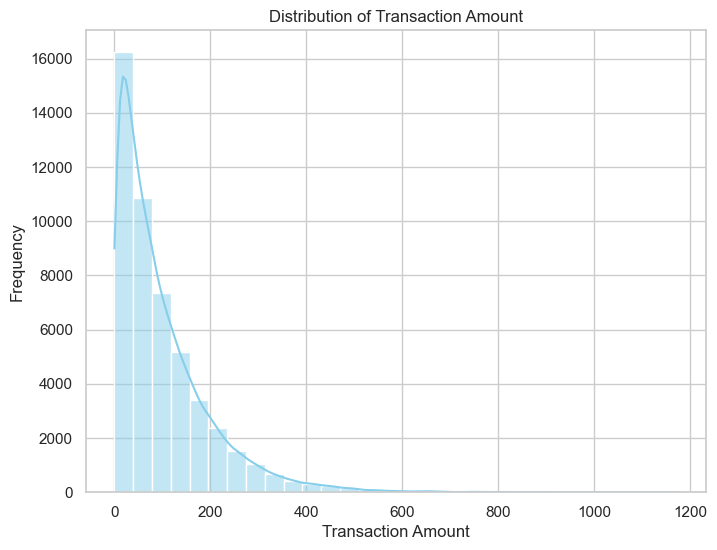

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Transaction_Amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# 2. Transaction Type count

C:\Users\PROGRESSIVE\AppData\Local\Temp\ipykernel_25296\888295129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Transaction_Type', palette='Set2')


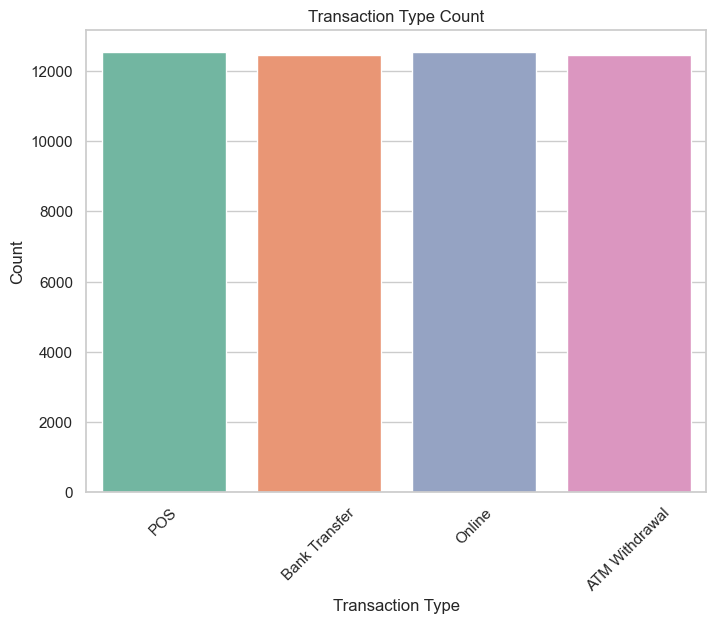

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Transaction_Type', palette='Set2')
plt.title('Transaction Type Count')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 3. Fraud Distribution (Fraud vs Not Fraud)

C:\Users\PROGRESSIVE\AppData\Local\Temp\ipykernel_25296\3654227961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Fraud_Label', palette='pastel')


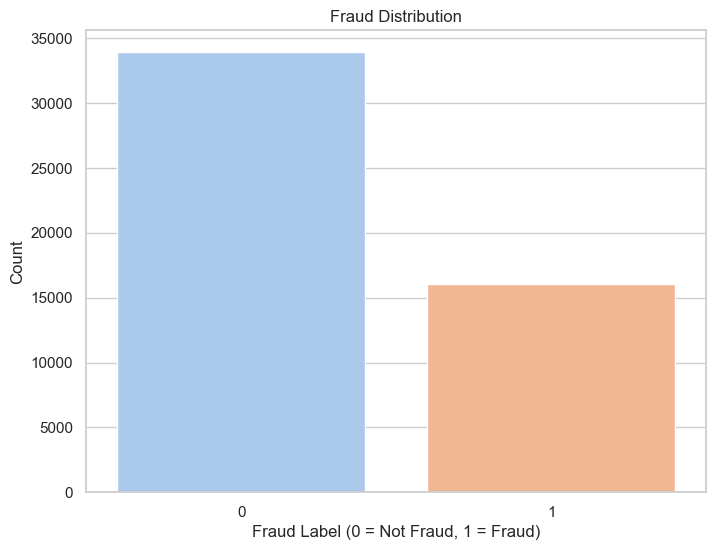

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Fraud_Label', palette='pastel')
plt.title('Fraud Distribution')
plt.xlabel('Fraud Label (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# 4. Fraud by Transaction Type

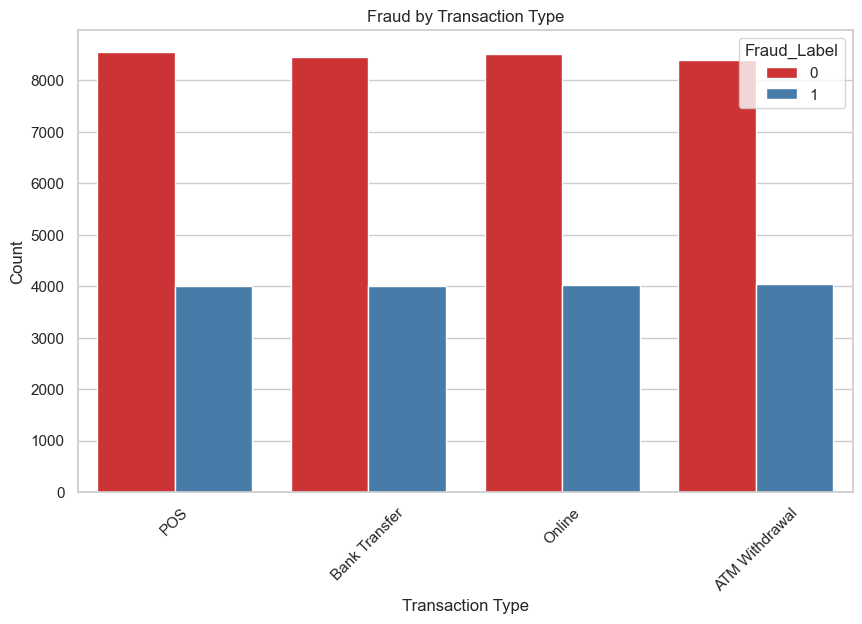

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Transaction_Type', hue='Fraud_Label', palette='Set1')
plt.title('Fraud by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5. Average Transaction Amount by Fraud

C:\Users\PROGRESSIVE\AppData\Local\Temp\ipykernel_25296\713002603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Fraud_Label', y='Transaction_Amount', palette='muted')


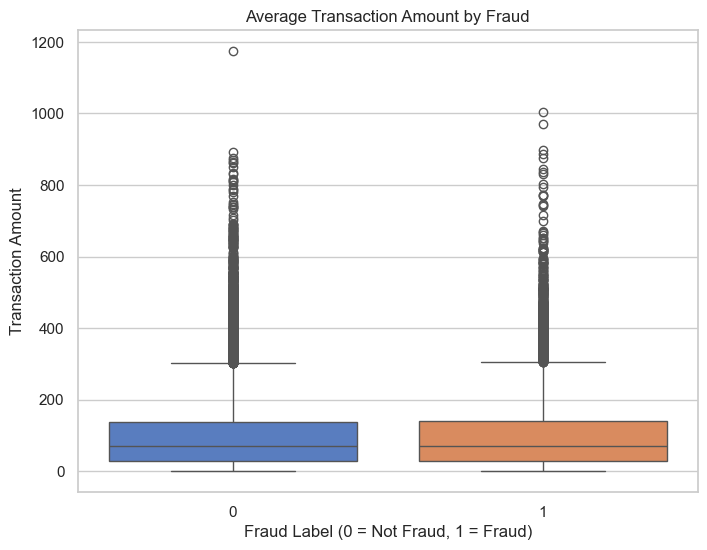

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='Fraud_Label', y='Transaction_Amount', palette='muted')
plt.title('Average Transaction Amount by Fraud')
plt.xlabel('Fraud Label (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

# 6. Risk Score Distribution

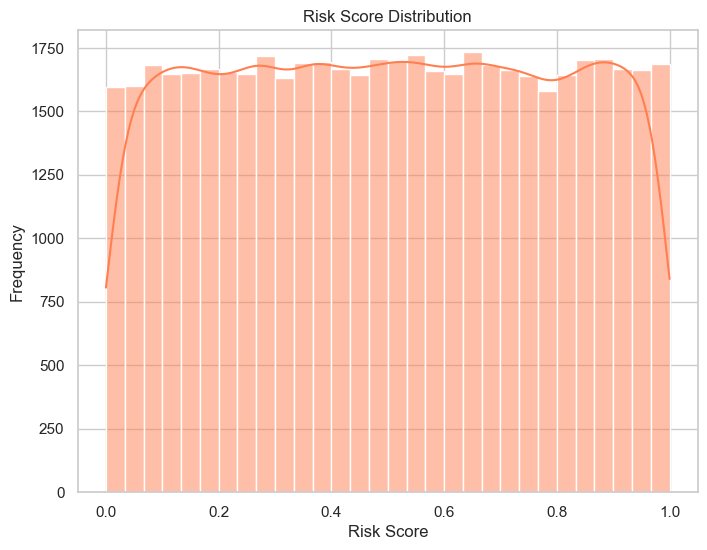

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Risk_Score'], bins=30, kde=True, color='coral')
plt.title('Risk Score Distribution')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()


# 7. Transaction Amount vs Risk Score (Scatter Plot)

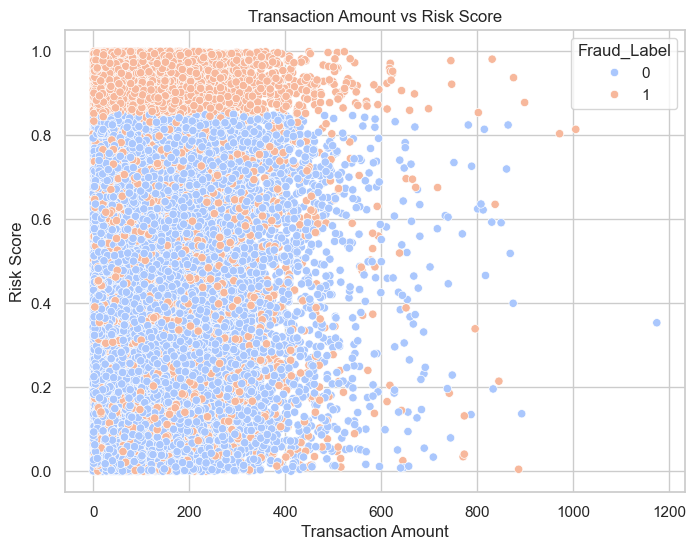

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Transaction_Amount', y='Risk_Score', hue='Fraud_Label', palette='coolwarm')
plt.title('Transaction Amount vs Risk Score')
plt.xlabel('Transaction Amount')
plt.ylabel('Risk Score')
plt.show()

# 8. Fraud by Device Type

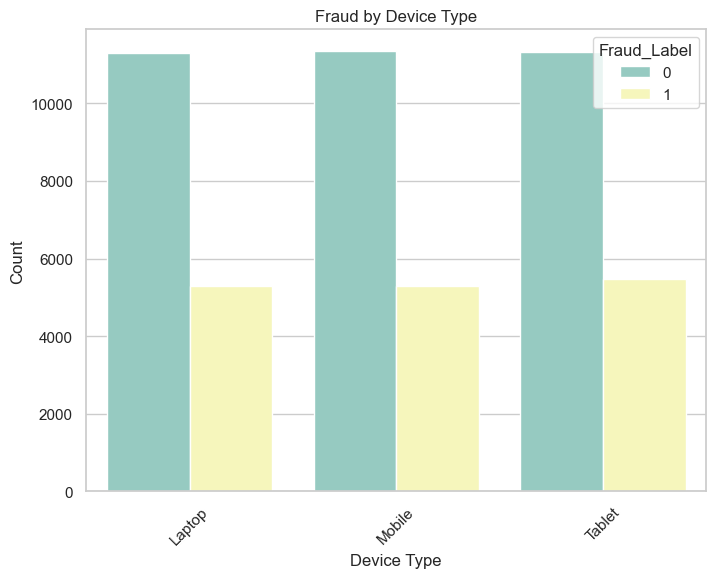

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Device_Type', hue='Fraud_Label', palette='Set3')
plt.title('Fraud by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 9. Fraud by Merchant Category

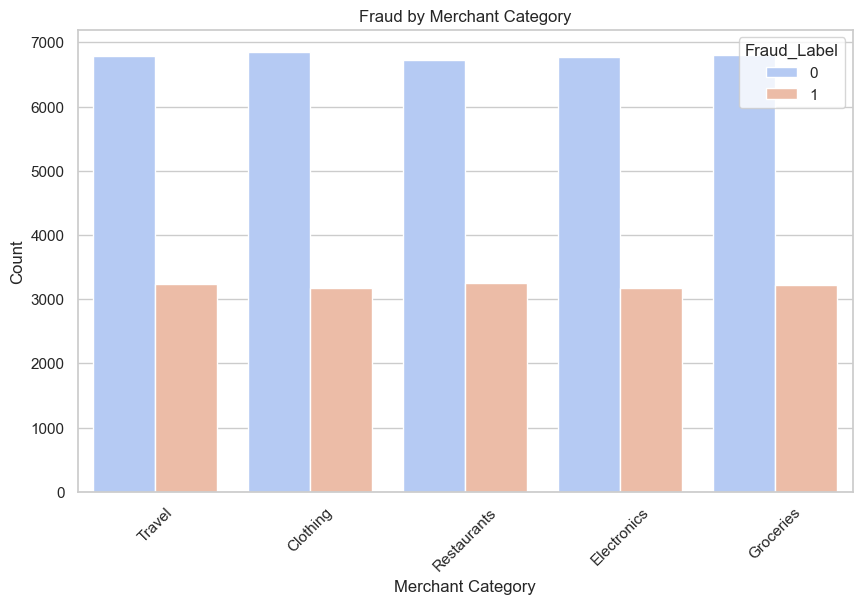

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Merchant_Category', hue='Fraud_Label', palette='coolwarm')
plt.title('Fraud by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 10. Fraud by Location (Geographical Analysis)

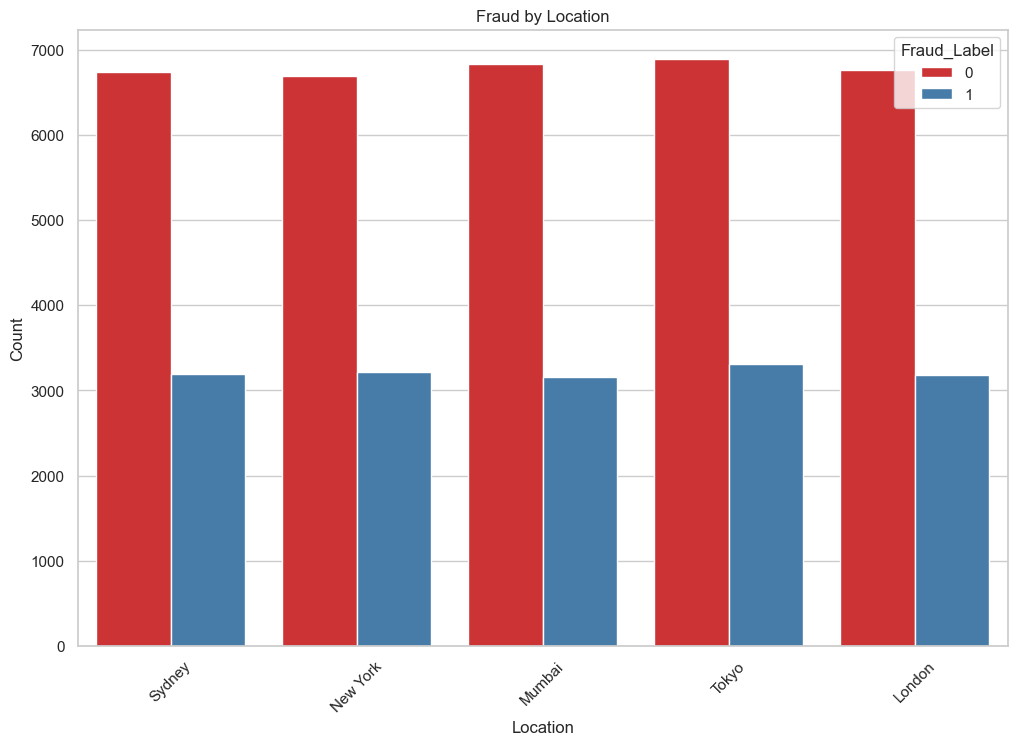

In [73]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, x='Location', hue='Fraud_Label', palette='Set1')
plt.title('Fraud by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 11. Fraud by Time (Month Analysis)

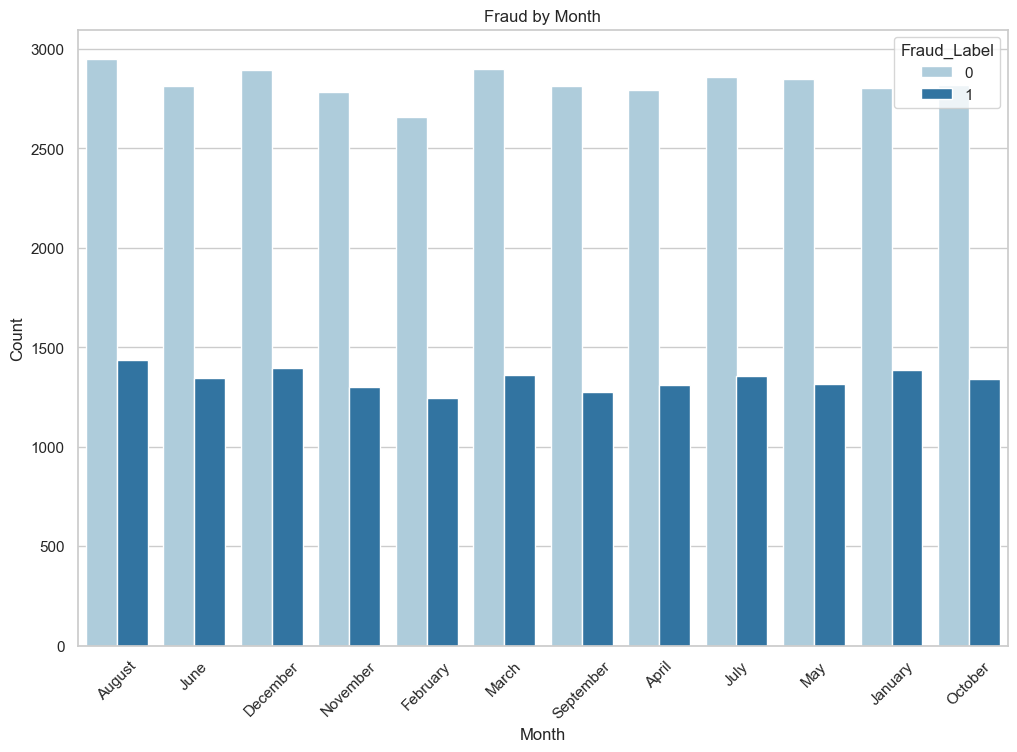

In [76]:
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
df_cleaned['Month'] = df_cleaned['Timestamp'].dt.month_name()

plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, x='Month', hue='Fraud_Label', palette='Paired')
plt.title('Fraud by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 12. Fraud by Time of Day (Hour Analysis)

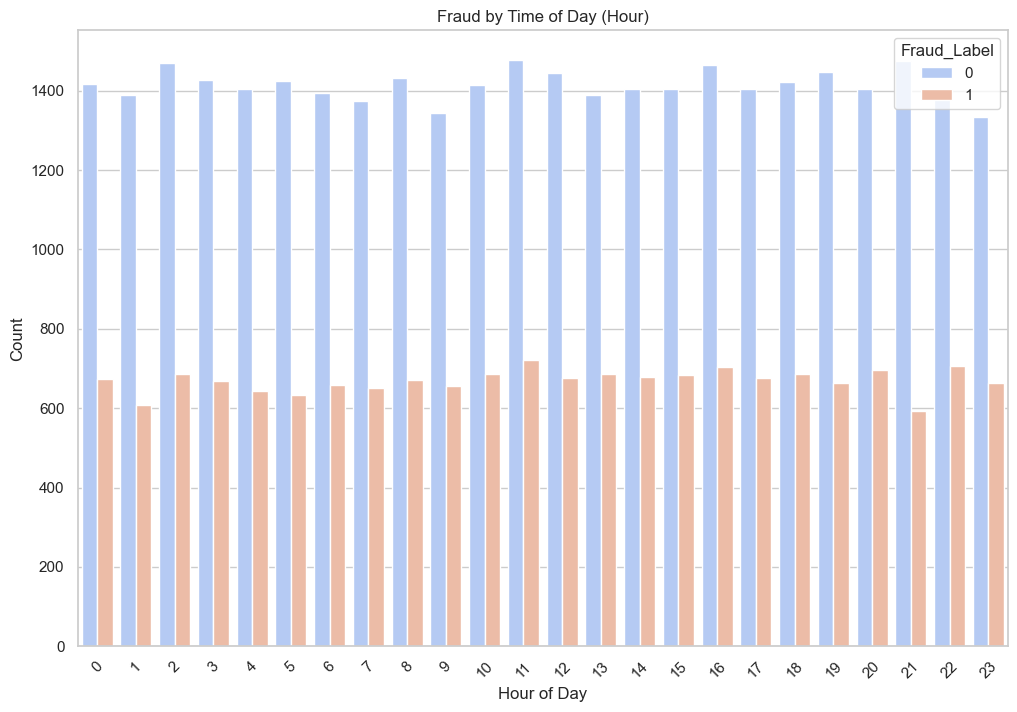

In [79]:
df_cleaned['Hour'] = df_cleaned['Timestamp'].dt.hour

plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, x='Hour', hue='Fraud_Label', palette='coolwarm')
plt.title('Fraud by Time of Day (Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()